In [28]:
import pandas
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [38]:
clean_dataset = pandas.read_csv('df_banco_final.csv', sep=';')
scores = pandas.read_csv('scores.csv', sep=';')

In [39]:
scores

,Model,accuracy,precision,recall,f1_score,roc_auc_score
0,KNeighborsClassifier,0.728571,0.691667,0.805825,0.744395,0.730015


In [10]:
y = clean_dataset['default']
x = clean_dataset.drop('default', axis=1)

In [11]:
x.head()

,account_check_status,duration_in_month,credit_history,savings,present_emp_since,installment_as_income_perc,other_debtors,property,age,other_installment_plans,...,job,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito,rango_plazos_credito_2,rango_edad_2
0,1,6,5,1,1,4,1,1,67,3,...,3,1,1,0,1,5,1,2,1,5
1,2,48,3,5,3,2,1,1,22,3,...,3,0,1,1,0,1,4,6,4,1
2,4,12,5,5,2,2,1,1,49,3,...,2,0,1,0,1,3,1,3,1,3
3,1,42,3,5,2,2,3,2,45,3,...,3,0,1,0,1,3,4,8,4,3
4,1,24,4,5,3,3,1,4,53,3,...,3,0,1,0,1,4,2,5,2,4


In [13]:
norm = StandardScaler()
x_normalized = norm.fit_transform(x)
x_normalized

array([[-1.06271653, -1.28600333,  1.50687935, ..., -0.62124939,
        -1.05547493,  2.80548   ],
       [-0.25059691,  2.07102202, -0.33157912, ...,  0.79816986,
         1.95811766, -0.85668504],
       [ 1.37364232, -0.80642828,  1.50687935, ..., -0.26639458,
        -1.05547493,  0.97439748],
       ...,
       [-1.06271653, -0.80642828, -2.17003758, ..., -0.62124939,
        -1.05547493, -0.85668504],
       [-0.25059691,  0.15272182, -0.33157912, ..., -0.26639458,
        -0.05094407, -0.85668504],
       [-1.06271653, -0.80642828, -0.33157912, ..., -0.62124939,
        -1.05547493, -0.85668504]])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [16]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [17]:
predictions

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,

## Evaluamos el modelo

### Matriz de confusión

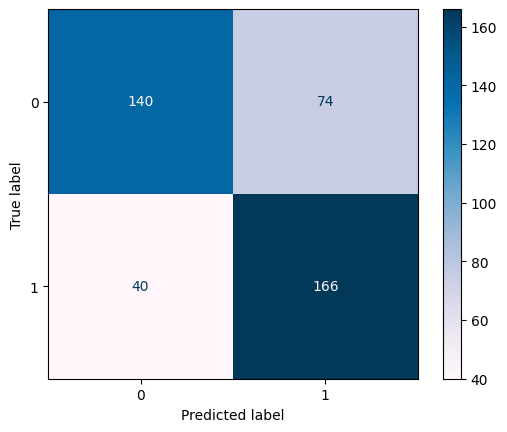

In [22]:
confmatrix = confusion_matrix(y_test, predictions)
confmatrix

visual_confmatrix = ConfusionMatrixDisplay(confmatrix)
visual_confmatrix.plot(cmap='PuBu')

In [23]:
confmatrix

array([[140,  74],
       [ 40, 166]], dtype=int64)

In [29]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
rocauc = roc_auc_score(y_test, predictions)

In [40]:
model_scores = {
  'Model': ['KNeighborsClassifier'],
  'accuracy': [accuracy],
  'precision': [precision],
  'recall': [recall],
  'f1_score': [f1],
  'roc_auc_score': [rocauc]
}
model_scores

{'Model': ['KNeighborsClassifier'],
 'accuracy': [0.7285714285714285],
 'precision': [0.6916666666666667],
 'recall': [0.8058252427184466],
 'f1_score': [0.7443946188340808],
 'roc_auc_score': [0.7300154250975411]}

In [54]:
criteria = scores['Model'] == 'pepe'
if (scores[criteria].bool):
  print('ya existe')
else:
  print('no existe')

# Me estaría faltando crear un método que detecte si ya existe un modelo en el Dataframe scores y en caso de existir que lo reemplace, no que sume un nuevo valor para el mismo modelo.

ya existe
